# Numpy random Package

In This jupyter notebook we will discuss the concepts behind the numpy random package its various uses. along with this we will plot and discuss the various distrubitions availble to use in the numpy random package.


We will be importing the numpy package as np and the matplotlib.pyplot package as plt we will be using this to plot our results.

In [1]:
#importing numpy as np for simplicity.
import numpy as np
#importing matplotlib.pyplot as plt for simplicity.
import matplotlib.pyplot as plt

We will start with the numpy.random.random() method to describe some of the fundementals of the numpy random package and will explain the concepts in more depth as we go on.

The below code is calling the random() method from numpys random package where size is the number of results we wish to generate. By default the random() method will generate an array of the given size(simply returns a single random value if no size is set) of floating point numbers between 0 and 1 including zero but not including one(ie. we can have 0,0.5 or even 0.99999 but not 1). This method uses uniform distribution to generate its random numbers.

In [2]:
#size = 5 generates ten random items.
np.random.random(size = 5)

array([0.80248854, 0.6009258 , 0.9878584 , 0.54063554, 0.72247937])

### Uniform Distrubution.

The uniform distribution used by numpys random() method is a symmetric probability distribution. this means that from what can be selected, in our case floats between 0 and 1, all possible values have the same probability of being selected. No bias or weight towards certain numbers. To show this we will generate 100,000 random numbers and plot the cumulative distribution function(CDF).

The CDF of a real-valued random variable R, evaluated at x, is the probability that R will take a value less than or equal to x. The expected CDF will be a straight line from (0,0) to (1,1) if all the points ploted on this graph are on this line then we have sucsessfuly shown that the random() method generates numbers from a uniform Distribution.

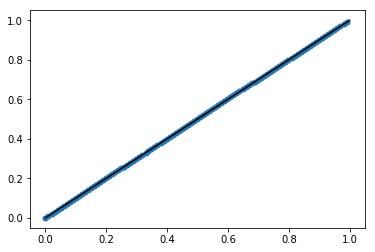

In [10]:
# Generate 100,000 random numbers and sort them.
x = np.sort(np.random.random(size=100000))

# Create CDF Y-Axis
y = np.arange(1, len(x)+1) / len(x)

# Plot CDF from random numbers (only selecting 100 points to improve legibility)
plt.plot(x[::1000], y[::1000], marker='.', linestyle='none', markersize=10)

# Plot expected CDF (just a straight line from (0,0) to (1,1)
plt.plot([0, 1], [0, 1], 'k-')
plt.show()

As we can see the numbers generated follow the expected line to a high level of accuracy. thus showing that numpys random() method generates numbers between using a uniform distribution. To further show this we can plot a histogram as seen bellow and each value has more or less equal distrabution.

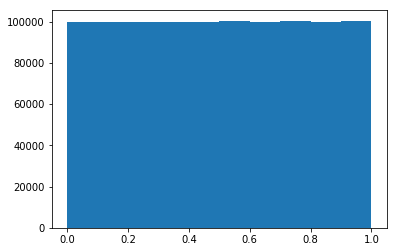

In [9]:
#The more values we use the more accurate the results in this case we have genereated one million numbers.
x = np.random.random(size=1000000)
#plots the generated numbers of an histogram.
plt.hist(x)
plt.show()